In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Data file.csv')
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

Columns Unnamed:0 and msisdn(mobile number of user) dosen't seem to be of any use

# EDA

In [3]:
df.shape

(209593, 37)

Dataset has 209593 rows and 37 columns

In [4]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

Except pdate and pcircle all the features are of numerical type. 

In [5]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

pcircle column has only one unique value so it is not a useful feature.

In [6]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no missing values in the dataset

In [7]:
df.skew()

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

Features of the data are very much skewed

In [8]:
print(df['label'].value_counts())

#print('Percentage of each category present')
#print(np.round((df['label'].value_counts()/df['label'].value_counts().sum())*100,2))

1    183431
0     26162
Name: label, dtype: int64


Dataset seems to be imbalaced 

In [9]:
df.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

Very high variance is present in dataset except for some features such as medianamnt_loans30. A number of outliers seem to be present as there is quite a huge differnce in the quartile ranges, min and max in almost all the columns except for label and maxamnt_loans90 columns. Difference between mean and median is high, therefore, data is not normally distributed and right skewed as mean is greater than median, but as there are 34 columns and only few of them are displayed, we will see for skewness and outliers separately.

### Univariate Analysis

Text(0.5, 1.0, '0- loan defaulters 1- non defaulters')

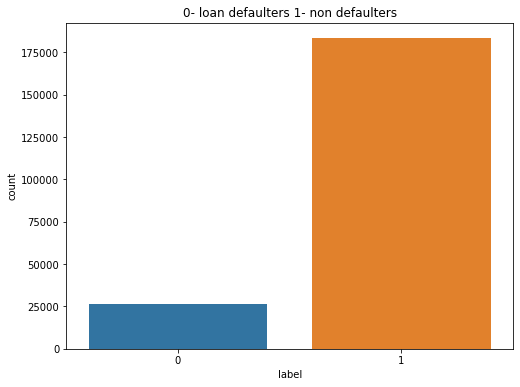

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(df['label'])
plt.title('0- loan defaulters 1- non defaulters')


Imbalanced Dataset

In [11]:
df.shape

(209593, 37)

In [12]:
#Now lets take the numerical features for plotting various graph to find various information

num_features=[feature for feature in df.columns  if df[feature].dtype!='O' and feature!='Unnamed: 0'] 
print('Number of numerical features {}'.format(len(num_features)))

Number of numerical features 33


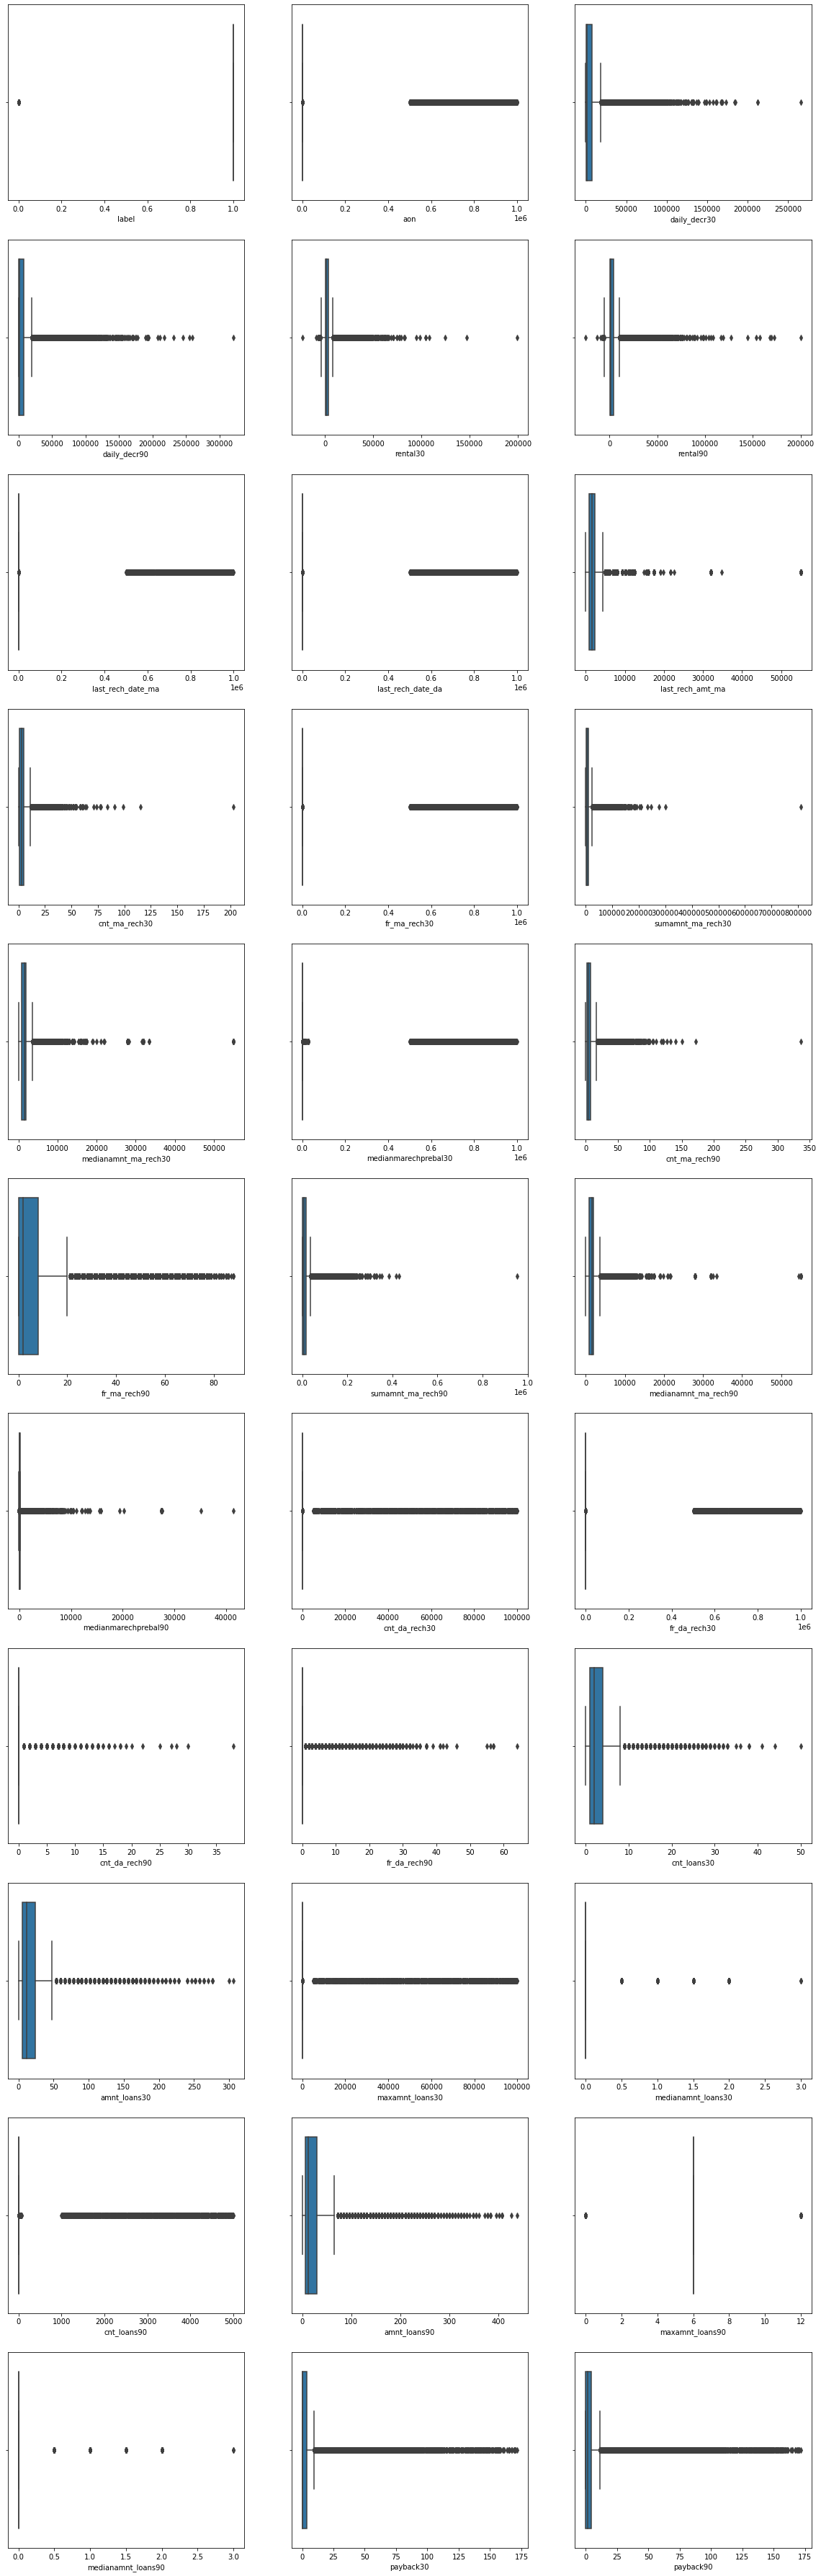

In [13]:
fig,ax=plt.subplots(11,3,figsize=(20,65))
row=0
col=0
for n,i in enumerate(num_features):
    if n%3==0 and n>0:
        row+=1
        col=0
    sns.boxplot(df[i],ax=ax[row,col])
    col+=1


Except for few all the features have large no. of outliers present

In [14]:
#Numerical feature are ususally of 2 types Continuous and Discrete
discrete=[feature for feature in num_features if df[feature].nunique()<30 and feature!='label']
continuous=[feature for feature in num_features if df[feature].nunique()>=30 and feature!='label']
print('Number of Discrete features {}'.format(len(discrete)))
print('Number of Continuous features {}'.format(len(continuous)))

Number of Discrete features 4
Number of Continuous features 28


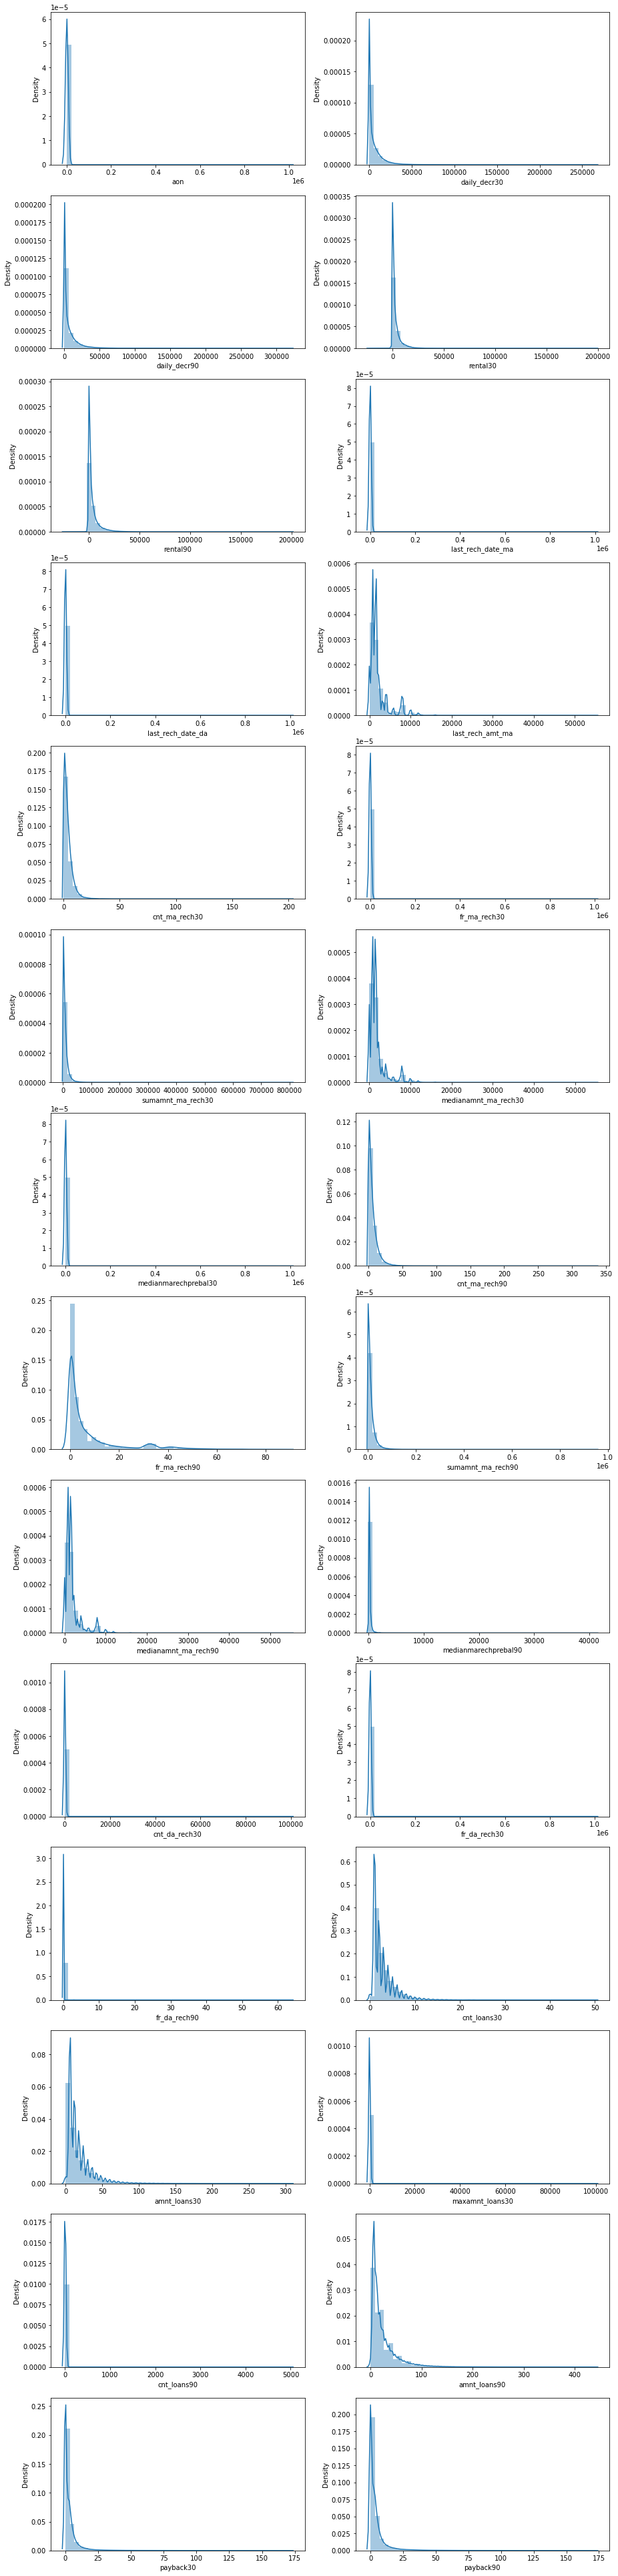

In [15]:
#lets se the distribution of continuos data
fig,ax=plt.subplots(14,2,figsize=(15,70))
r=0
c=0
for n,i in enumerate(continuous):
    if n%2==0 and n>0:
        r+=1
        c=0
    sns.distplot(df[i],ax=ax[r,c])
    c+=1

In some of the columns data is right skewed and there are negative values present

### Bivariate Analysis

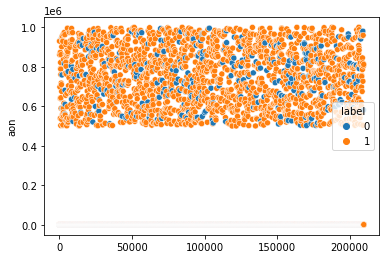

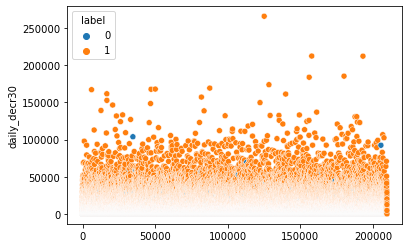

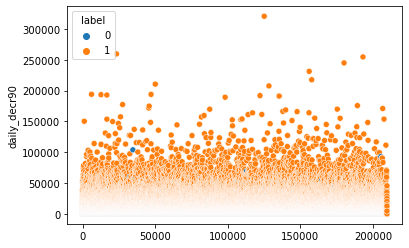

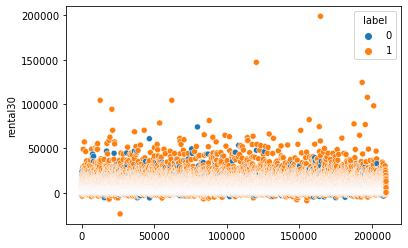

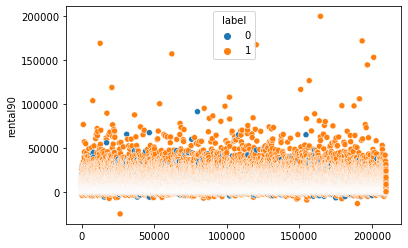

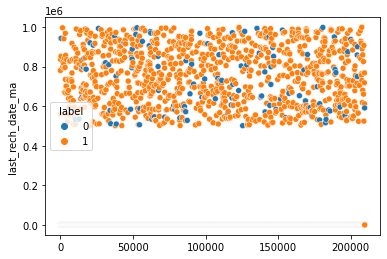

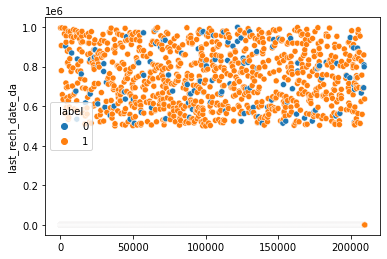

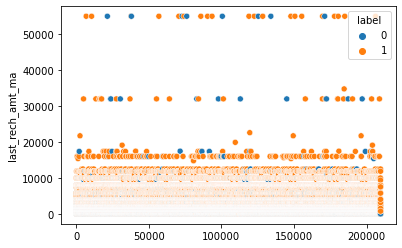

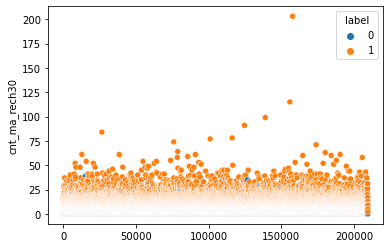

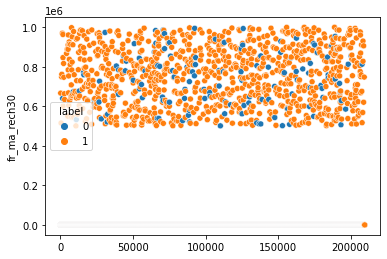

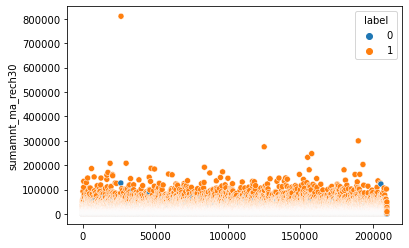

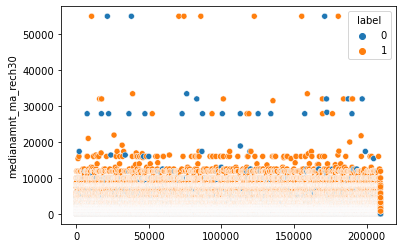

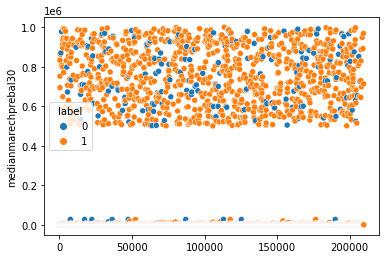

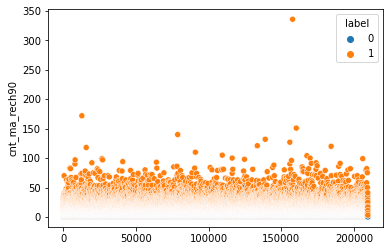

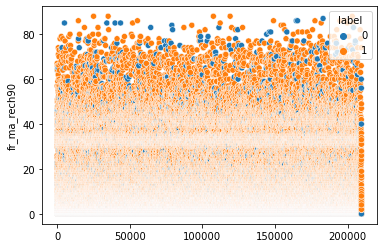

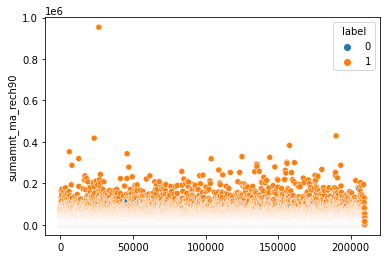

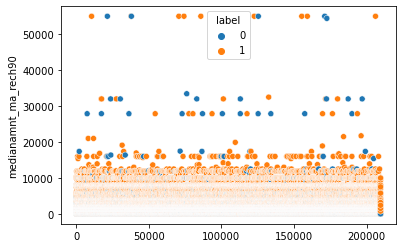

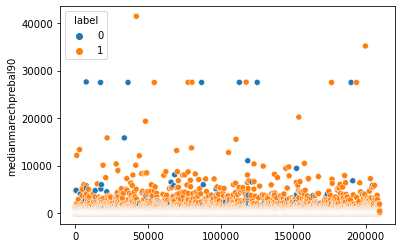

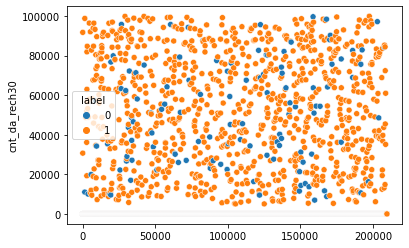

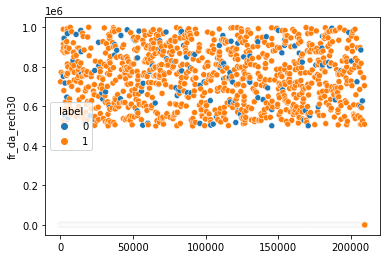

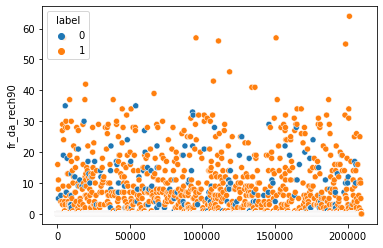

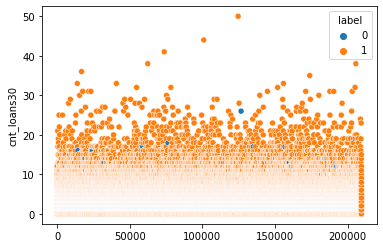

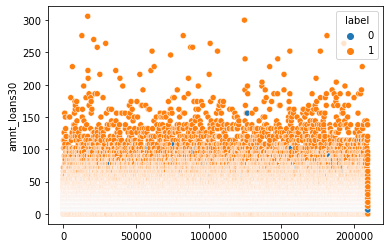

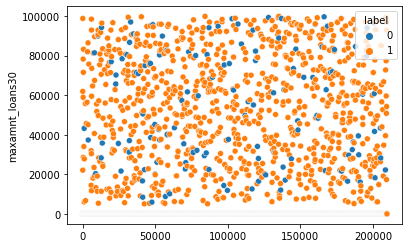

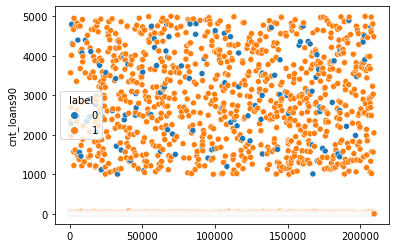

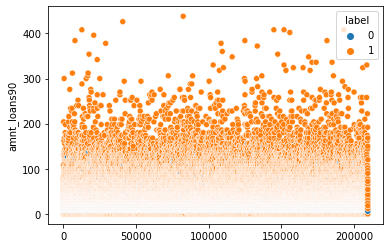

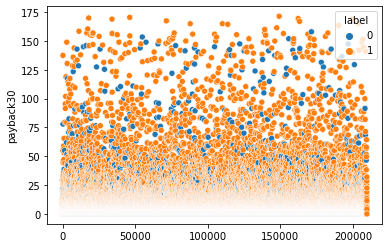

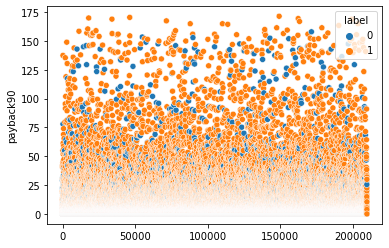

<Figure size 432x288 with 0 Axes>

In [16]:
#Lets see the relationship of continuous variables with the label class
for i in continuous:
    sns.scatterplot(df.index,df[i],hue=df['label'])
    plt.figure()

There dosent seem to be any linear dependency of features with the label class. SVM's kernel trick might be useful here

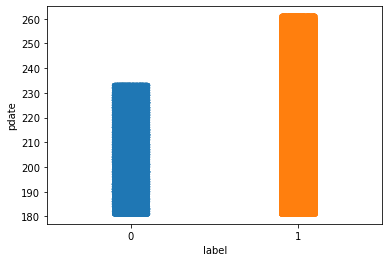

In [17]:
#Lets explore if there is a relation between pdate and customers paying back loan or not.
#Not considering year since year is same for all customers

#converting months and days to days
a=pd.to_datetime(df['pdate'])
month=(a.dt.month)*30
day=a.dt.day
time_in_days=month+day
sns.stripplot(x=df['label'],y=time_in_days)

People on the network for longer than 240 days payback thier loan

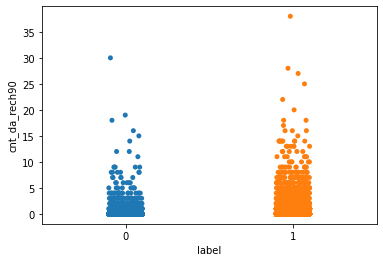

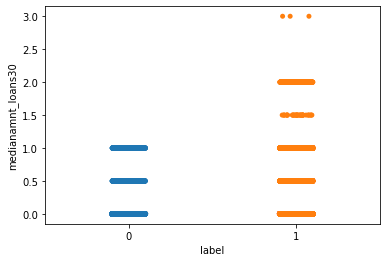

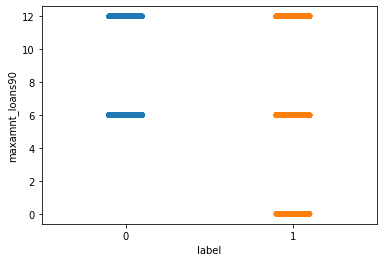

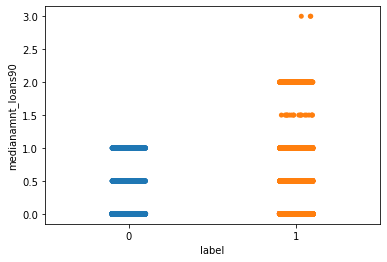

<Figure size 432x288 with 0 Axes>

In [18]:
#lets find relationship between discrete features and label 
for feature in discrete:
    sns.stripplot(x=df['label'],y=df[feature])
    plt.figure()

People recharging their data account more no. of times and People taking more no. of loans seem to payback their loan

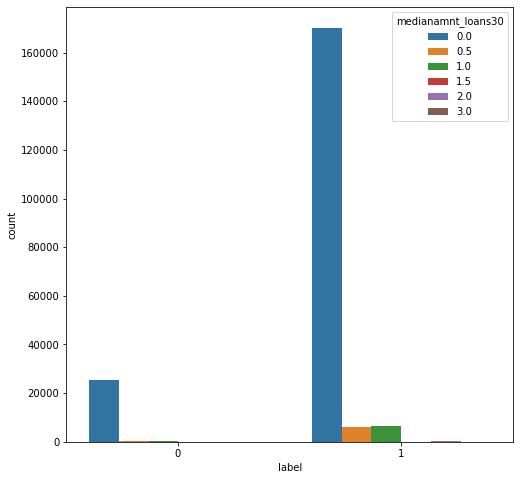

In [19]:
plt.figure(figsize=(8,8))
sns.countplot(df['label'],hue=df['medianamnt_loans30'])


People taking higher higher no. loans(median>2) also payback there loan.

### Multivariate Analysis

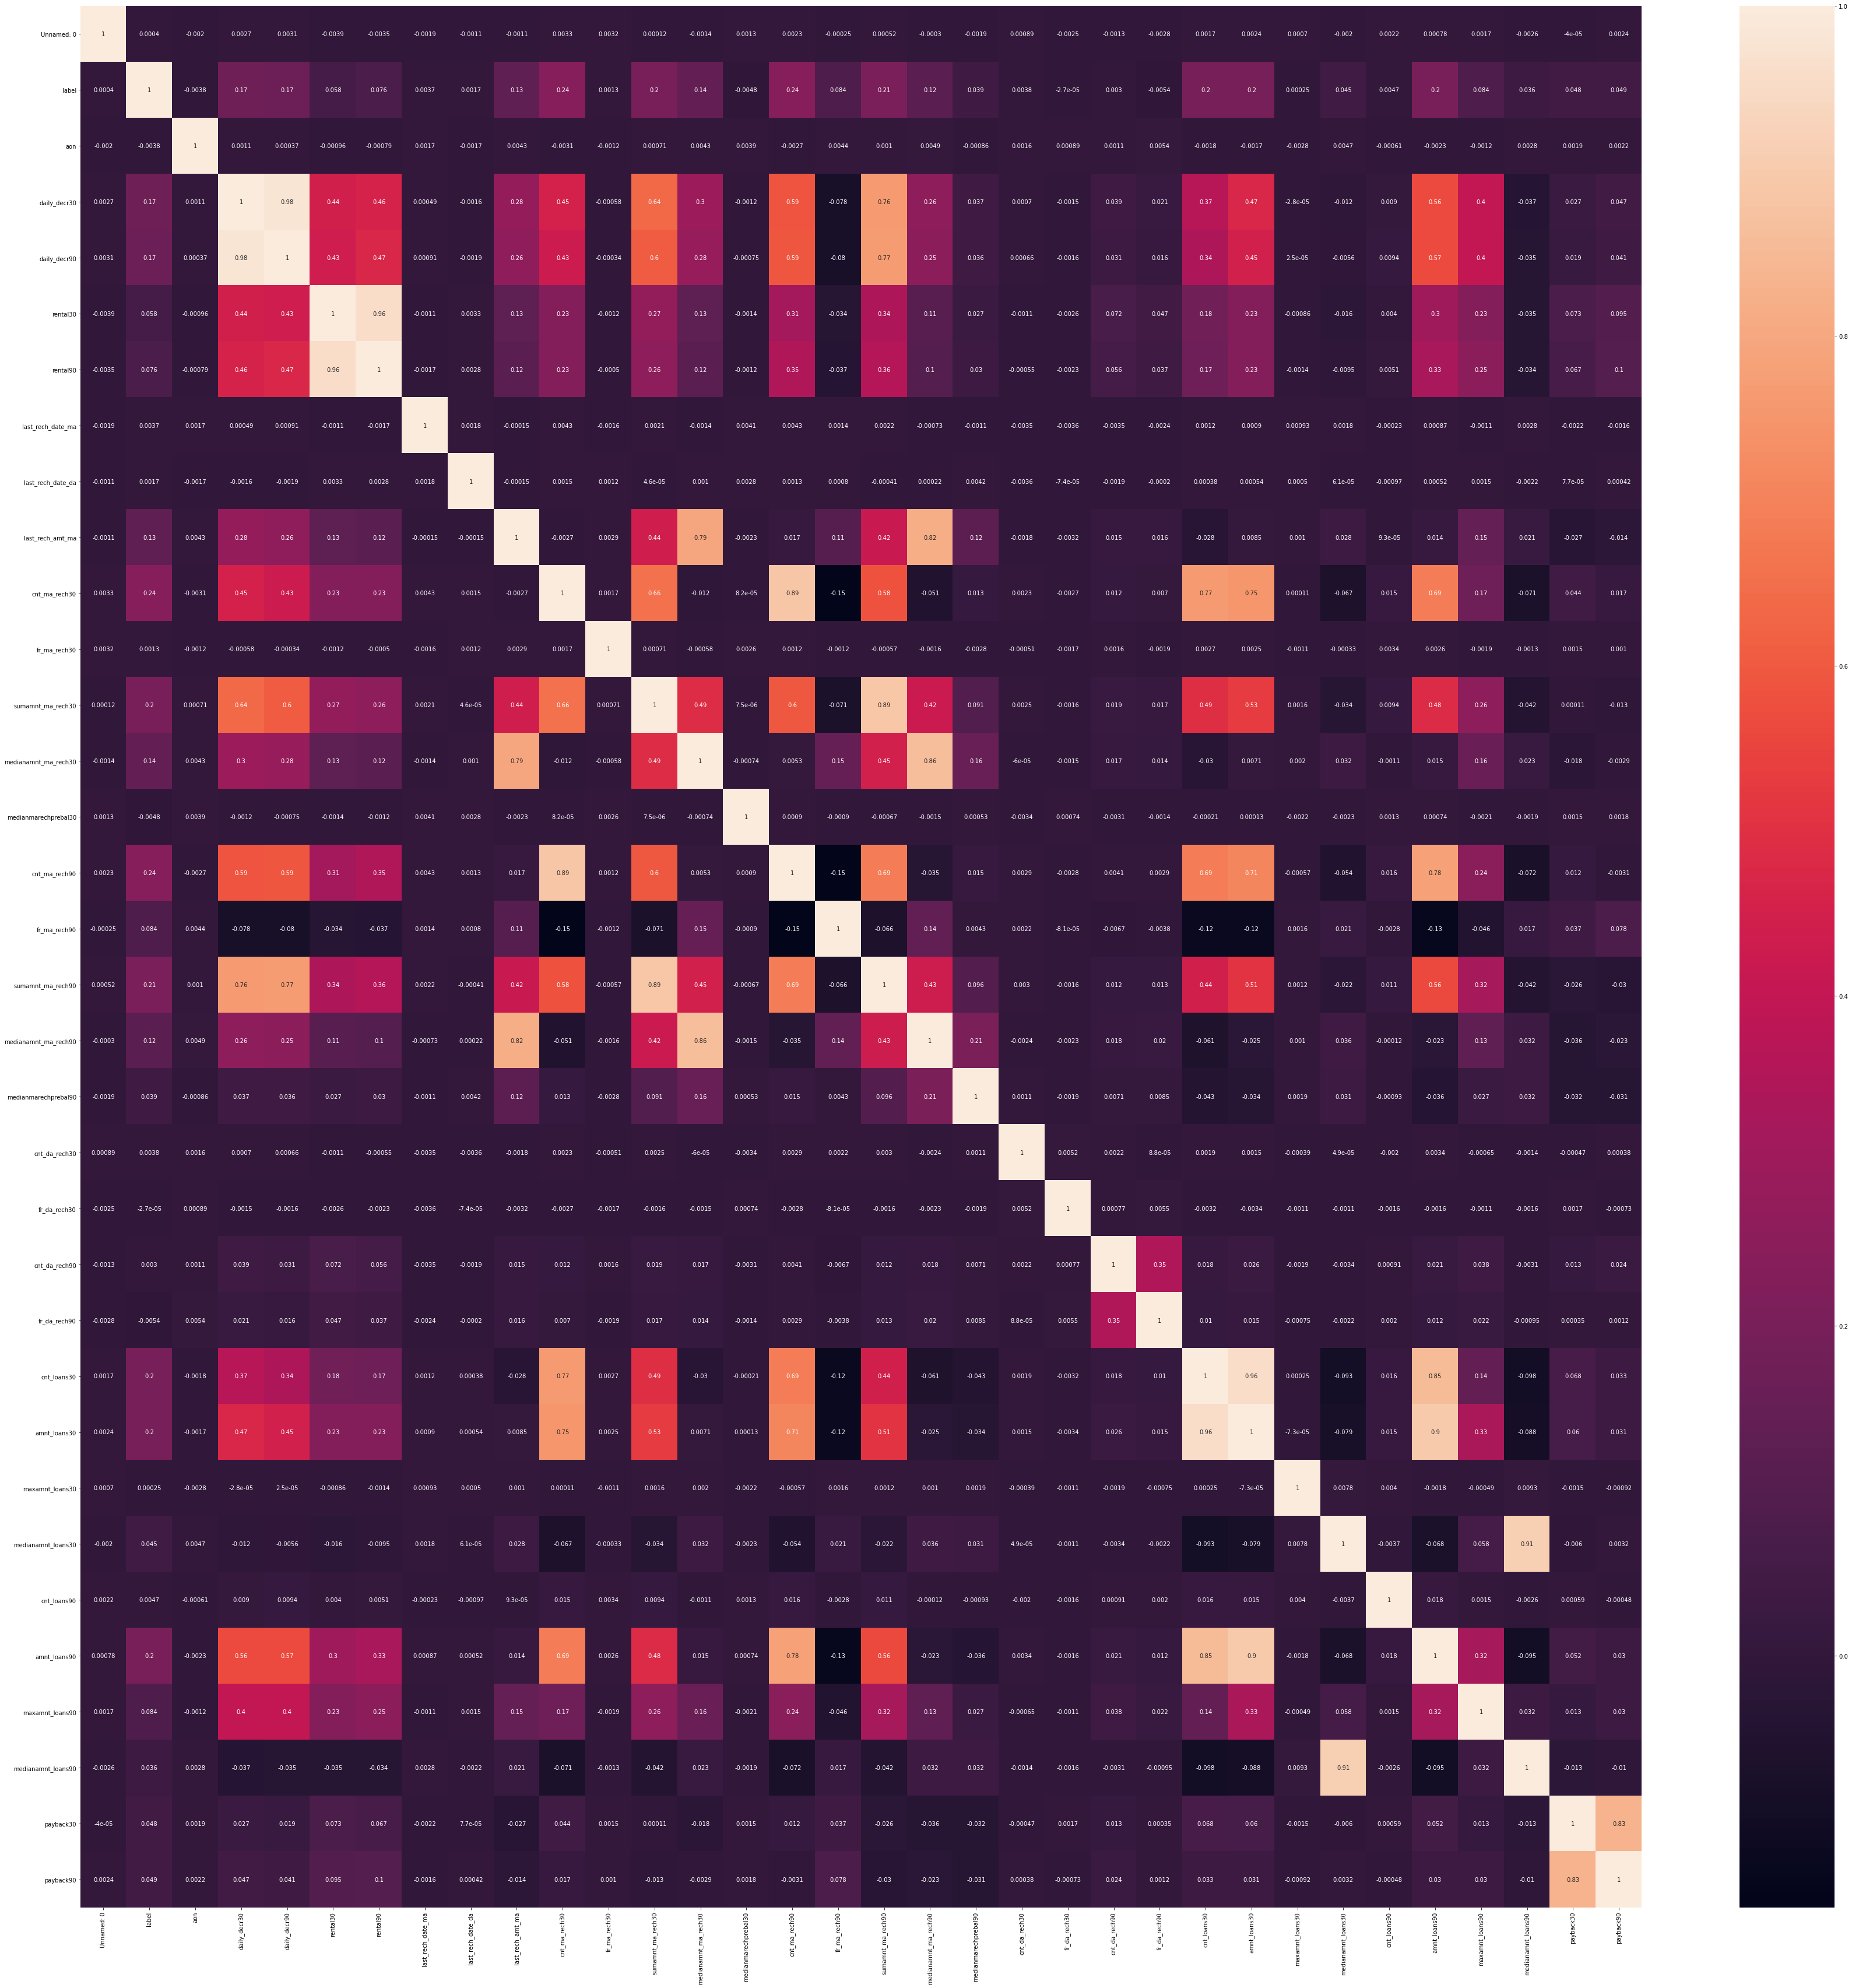

In [20]:
plt.figure(figsize=(60,60))
sns.heatmap(df.corr(),annot=True)

Label class shows positive correlation with only 9 features out 37 features, that too very little. There are few independent features which show strong positive correlation with other independent features. Naive bayes and Logistic Regressio may have difficulty predicting classes with the dataset.

# Feature Engineering

In [21]:
#Removing Unnamed: 0, msisdn and pcircle column as they aren't useful
df.drop(['Unnamed: 0','msisdn','pcircle'],axis=1,inplace=True)

In [22]:
#pdate column is of object type
#first we convert it to type datetime then extract year month and date

df['pdate']=pd.to_datetime(df['pdate'])
df['year']=2021-df['pdate'].dt.year
df['month']=df['pdate'].dt.month
df['day']=df['pdate'].dt.day

In [23]:
print(df['year'].unique())
df.head()

[5]


label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          2.0            12                6                 0.0  29.000000   
1          1.0            12               12                 0.0   0.000000   
2          1.0             6                6                 0.0   0.000000   
3          2.0            12                6                 0.0   0.000000   
4          7.0            42                6                 0.0   2.333333   

   payback90      pdate  year  month  day  
0  29.000000 2016-07-20     5      7   20  
1   0.000000 2016-08-10     5      8   10  
2   0.000000 2016-08-19     5      8   19  
3   0.000000 2016-06-06     5      6    6  
4   2.333333 2016-06-22     5      6   22  

[5 rows x 37 columns]

Year column need to be dopped as it has only one unique value as well as pdate, as we have already extracted useful information from it.

In [24]:
df.drop(['year','pdate'],axis=1,inplace=True)

In [25]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  month  day  
0                6                 0.0  29.000000  29.000000      7   20  
1               12                 0.0   0.000000   0.000000      8   10  
2                6                 0.0   0.000000   0.000000      8   19  
3                6                 0.0   0.000000   0.000000      6    6  
4                6                 0.0   2.333333   2.333333      6   22  

[5 rows x 35 columns]

In [26]:
#Merging month and date column by converting month into days
df['days']=(df['month']*30)+df['day']
df.drop(['month','day'],inplace=True,axis=1)
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0            12              6.0                 0.0          2.0   
1            12             12.0                 0.0          1.0   
2             6              6.0                 0.0          1.0   
3            12              6.0                 0.0          2.0   
4            42              6.0                 0.0          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0            12                6                 0.0  29.000000  29.000000   
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   

   days  
0   230  
1   250  
2   259  
3   186  
4   202  

[5 rows x 34 columns]

In [27]:
#zscore method to remove outliers
from scipy.stats import zscore
def zscoremethod(d):
    data=d.copy()
    z=np.abs(zscore(data))
    df_n=data[(z<3).all(axis=1)]
    return df_n

In [28]:
#IQR method to remove outliers
def iqrmethod(d):
    data=d.copy()
    drop_outliers = np.array([])
    for col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        upper_whisker = q3 + (1.5*iqr)
        lower_whisker = q1 - (1.5*iqr)
        s = data[col]
        indexes = s[(s > upper_whisker) | (s< lower_whisker)].index
        drop_outliers = np.append(drop_outliers, indexes)
    dropped = np.unique(drop_outliers)
    df_trim=data.drop(dropped)
    return df_trim

In [29]:
df_zscore=zscoremethod(df)
df_iqr=iqrmethod(df)
print('Percentage of data lost by Zscore    {}%'.format(np.round((df.shape[0]-df_zscore.shape[0])/df.shape[0]*100,2)))
print('Percentage of data lost by IQR       {}%'.format(np.round((df.shape[0]-df_iqr.shape[0])/df.shape[0]*100,2)))

Percentage of data lost by Zscore    22.96%
Percentage of data lost by IQR       72.98%


Data loss by both the method is way too much.

In [30]:
#To reduce the data loss we use zscore method to find the best threshold value.
def best_threshold(d):
    for threshold in np.arange(4,8,0.2):
        data=d.copy()
        z=np.abs(zscore(data))
        df_new=data[(z<threshold).all(axis=1)]
        print('With threshold {}, data loss is {}%'.format(np.round(threshold,2),np.round((d.shape[0]-df_new.shape[0])/d.shape[0]*100,4)))
        

In [31]:
best_threshold(df)

With threshold 4.0, data loss is 15.5959%
With threshold 4.2, data loss is 14.7462%
With threshold 4.4, data loss is 13.6646%
With threshold 4.6, data loss is 13.0233%
With threshold 4.8, data loss is 9.8815%
With threshold 5.0, data loss is 9.1115%
With threshold 5.2, data loss is 8.6487%
With threshold 5.4, data loss is 8.3424%
With threshold 5.6, data loss is 7.996%
With threshold 5.8, data loss is 7.7627%
With threshold 6.0, data loss is 7.4845%
With threshold 6.2, data loss is 7.3113%
With threshold 6.4, data loss is 7.1133%
With threshold 6.6, data loss is 6.9482%
With threshold 6.8, data loss is 6.7679%
With threshold 7.0, data loss is 6.5918%
With threshold 7.2, data loss is 6.4501%
With threshold 7.4, data loss is 6.3156%
With threshold 7.6, data loss is 6.1309%
With threshold 7.8, data loss is 6.0074%


Best threshold value seems to be 6.6 as there is close to 7% data loss only

In [32]:
z=np.abs(zscore(df))
df=df[(z<6.6).all(axis=1)]
df.shape

(195030, 34)

After removing outliers 195030 rows remain.

In [33]:
#Separating Dependent and Independent features into x(independent features) and y(dependent feature)
x=df.copy()
x.drop('label',axis=1,inplace=True)
y=df['label']

In [34]:
print(x.shape)
x.head()

(195030, 33)


aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0  272.0   3055.050000   3065.150000    220.13    260.13                2.0   
1  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0   
2  535.0   1398.000000   1398.000000    900.13    900.13                3.0   
3  241.0     21.228000     21.228000    159.42    159.42               41.0   
4  947.0    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  ...  \
0                0.0              1539              2          21.0  ...   
1                0.0              5787              1           0.0  ...   
2                0.0              1539              1           0.0  ...   
3                0.0               947              0           0.0  ...   
4                0.0              2309              7           2.0  ...   

   amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0            12              6.0                 0.0          2.0   
1            12             12.0                 0.0          1.0   
2             6              6.0                 0.0          1.0   
3            12              6.0                 0.0          2.0   
4            42              6.0                 0.0          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0            12                6                 0.0  29.000000  29.000000   
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   

   days  
0   230  
1   250  
2   259  
3   186  
4   202  

[5 rows x 33 columns]

In [35]:
print(y.shape)
y.head()

(195030,)


0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [36]:
#Handling Imbalanced Dataset

from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()


In [37]:
x_over,y_over=os.fit_resample(x,y)
print(x_over.shape,y_over.shape)

(341058, 33) (341058,)


After performing oversampling, number of rows have increased to 341058

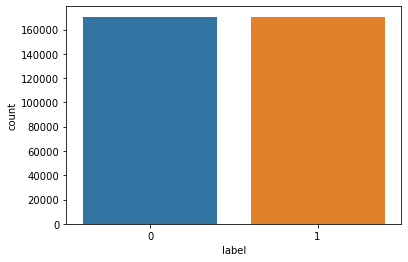

In [38]:
sns.countplot(y_over)

Now the label class is balances

In [39]:
#Further we Scale the data

from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [40]:
#We perform scaling by applying  min max scaler

xd=mm.fit_transform(x_over)
x_over=pd.DataFrame(xd,columns=x_over.columns)

In [41]:
from sklearn.model_selection import train_test_split,cross_val_score

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x_over,y_over,test_size=0.25,random_state=7)

In [43]:
#Importing Classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [45]:
def performance1(a,b,c,d):
    print('Accuracy',accuracy_score(a,b))
    print('-------------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(a,b))
    print('-------------------------------------------------')
    print('Classification Report')
    print(classification_report(a,b))

In [46]:
#Calculates performance of a model
def performance(a,b,c,d):
    print('Accuracy',accuracy_score(a,b))
    print('-------------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(a,b))
    print('-------------------------------------------------')
    print('Classification Report')
    print(classification_report(a,b))
    print('-------------------------------------------------')
    print('ROC-AUC score',roc_auc_score(b,c.predict_proba(d)[:,1]))

### KNN Classifier

In [47]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
p=knn.predict(xtest)
performance(p,ytest,knn,xtest)

Accuracy 0.8843370667917668
-------------------------------------------------
Confusion Matrix
[[41598  8872]
 [  990 33805]]
-------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     50470
           1       0.79      0.97      0.87     34795

    accuracy                           0.88     85265
   macro avg       0.88      0.90      0.88     85265
weighted avg       0.90      0.88      0.89     85265

-------------------------------------------------
ROC-AUC score 0.941407418731946


### SVM Classifier

In [48]:
sv=SVC()
sv.fit(xtrain,ytrain)
p=sv.predict(xtest)
performance1(p,ytest,sv,xtest)

Accuracy 0.8160089133876737
-------------------------------------------------
Confusion Matrix
[[35909  9009]
 [ 6679 33668]]
-------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     44918
           1       0.79      0.83      0.81     40347

    accuracy                           0.82     85265
   macro avg       0.82      0.82      0.82     85265
weighted avg       0.82      0.82      0.82     85265



### Decision Tree

In [49]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
p=dt.predict(xtest)
performance(p,ytest,dt,xtest)

Accuracy 0.9592212513927169
-------------------------------------------------
Confusion Matrix
[[42521  3410]
 [   67 39267]]
-------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     45931
           1       0.92      1.00      0.96     39334

    accuracy                           0.96     85265
   macro avg       0.96      0.96      0.96     85265
weighted avg       0.96      0.96      0.96     85265

-------------------------------------------------
ROC-AUC score 0.9592859607083176


### Logistic Regression

In [50]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
p=lr.predict(xtest)
performance(p,ytest,lr,xtest)

Accuracy 0.7631619069958365
-------------------------------------------------
Confusion Matrix
[[34070 11676]
 [ 8518 31001]]
-------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.74      0.77     45746
           1       0.73      0.78      0.75     39519

    accuracy                           0.76     85265
   macro avg       0.76      0.76      0.76     85265
weighted avg       0.77      0.76      0.76     85265

-------------------------------------------------
ROC-AUC score 0.8355345983662263


### Random Forrest

In [51]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
p=rf.predict(xtest)
performance(p,ytest,rf,xtest)

Accuracy 0.977048026740163
-------------------------------------------------
Confusion Matrix
[[42536  1905]
 [   52 40772]]
-------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     44441
           1       0.96      1.00      0.98     40824

    accuracy                           0.98     85265
   macro avg       0.98      0.98      0.98     85265
weighted avg       0.98      0.98      0.98     85265

-------------------------------------------------
ROC-AUC score 0.9988716179809923


### Adaboost

In [52]:
ab=AdaBoostClassifier()
ab.fit(xtrain,ytrain)
p=ab.predict(xtest)
performance(p,ytest,ab,xtest)

Accuracy 0.8392540901894094
-------------------------------------------------
Confusion Matrix
[[36315  7433]
 [ 6273 35244]]
-------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     43748
           1       0.83      0.85      0.84     41517

    accuracy                           0.84     85265
   macro avg       0.84      0.84      0.84     85265
weighted avg       0.84      0.84      0.84     85265

-------------------------------------------------
ROC-AUC score 0.9225089403790866


### Gradient Boost

In [53]:
gb=GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
p=gb.predict(xtest)
performance(p,ytest,gb,xtest)

Accuracy 0.8533044039171993
-------------------------------------------------
Confusion Matrix
[[36731  6651]
 [ 5857 36026]]
-------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     43382
           1       0.84      0.86      0.85     41883

    accuracy                           0.85     85265
   macro avg       0.85      0.85      0.85     85265
weighted avg       0.85      0.85      0.85     85265

-------------------------------------------------
ROC-AUC score 0.9329479909503198


### Xtreme Gradient Boost

In [54]:
xg=XGBClassifier(verbosity=0)
xg.fit(xtrain,ytrain)
p=xg.predict(xtest)
performance(p,ytest,xg,xtest)

Accuracy 0.8903770597548818
-------------------------------------------------
Confusion Matrix
[[38994  5753]
 [ 3594 36924]]
-------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.87      0.89     44747
           1       0.87      0.91      0.89     40518

    accuracy                           0.89     85265
   macro avg       0.89      0.89      0.89     85265
weighted avg       0.89      0.89      0.89     85265

-------------------------------------------------
ROC-AUC score 0.9572737992191545


#### Observations

Best performing models are
    -Decision Tree
    -Random Forest
    -Xgboost

### Hyperparameter tuning

In [55]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

###### Decision Tree Tuning

In [56]:
param_grid={'criterion':['gini', 'entropy'],
            'splitter':['best', 'random'],
            'max_features':['auto', 'sqrt', 'log2','None','int','float']}

In [57]:
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,n_jobs=-2)

In [58]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2', 'None', 'int',
                                          'float'],
                         'splitter': ['best', 'random']})

In [59]:
grid.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'}

In [60]:
grid.best_score_

0.9524811045568324

In [75]:
dt=DecisionTreeClassifier(criterion='gini',max_features= 'auto',splitter='best')
dt.fit(xtrain,ytrain)
p=dt.predict(xtest)
score=cross_val_score(dt,x_over,y_over,cv=5)
performance(p,ytest,dt,xtest)
print('Mean of Cross validation Score',score.mean())

Accuracy 0.9605230751187475
-------------------------------------------------
Confusion Matrix
[[42523  3301]
 [   65 39376]]
-------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     45824
           1       0.92      1.00      0.96     39441

    accuracy                           0.96     85265
   macro avg       0.96      0.96      0.96     85265
weighted avg       0.96      0.96      0.96     85265

-------------------------------------------------
ROC-AUC score 0.960583008347432
Mean of Cross validation Score 0.9624169524963829


###### Random Parameter Forest Tuning

In [63]:
param_grid={'n_estimators':[400,500,700,900,1100],
            'criterion':['gini','entropty'],
           'max_features':['int','float','auto','log2']}

In [64]:
g=RandomizedSearchCV(RandomForestClassifier(),param_grid,cv=5)

In [65]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropty'],
                                        'max_features': ['int', 'float', 'auto',
                                                         'log2'],
                                        'n_estimators': [400, 500, 700, 900,
                                                         1100]})

In [66]:
g.best_params_

{'n_estimators': 1100, 'max_features': 'log2', 'criterion': 'gini'}

In [67]:
g.best_score_

0.9728530501819996

In [76]:
rf=RandomForestClassifier(n_estimators= 1100, max_features='log2', criterion='gini')
rf.fit(xtrain,ytrain)
p=rf.predict(xtest)
score=cross_val_score(rf,x_over,y_over,cv=5)
performance(p,ytest,rf,xtest)
print('Mean of Cross validation Score',score.mean())

Accuracy 0.9778807247991556
-------------------------------------------------
Confusion Matrix
[[42533  1831]
 [   55 40846]]
-------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     44364
           1       0.96      1.00      0.98     40901

    accuracy                           0.98     85265
   macro avg       0.98      0.98      0.98     85265
weighted avg       0.98      0.98      0.98     85265

-------------------------------------------------
ROC-AUC score 0.999026847495037
Mean of Cross validation Score 0.9798831870400642


###### Xtreme Gradient Boost Parameter Tuning

In [69]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [70]:
g=RandomizedSearchCV(XGBClassifier(verbosity=0),params,cv=5)

In [71]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

In [72]:
g.best_params_

{'min_child_weight': 5,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [73]:
g.best_score_

0.9475435224468403

In [74]:
xg=XGBClassifier(min_child_weight=5,max_depth=15,learning_rate=0.1,gamma= 0.4,colsample_bytree= 0.7,verbosity=0)
xg.fit(xtrain,ytrain)
p=xg.predict(xtest)
score=cross_val_score(xg,x_over,y_over,cv=5)
performance(p,ytest,xg,xtest)
print('Mean of Cross validation Score',score.mean())

Accuracy 0.9479739635254794
-------------------------------------------------
Confusion Matrix
[[41841  3689]
 [  747 38988]]
-------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     45530
           1       0.91      0.98      0.95     39735

    accuracy                           0.95     85265
   macro avg       0.95      0.95      0.95     85265
weighted avg       0.95      0.95      0.95     85265

-------------------------------------------------
ROC-AUC score 0.9832799185326038
Mean of Cross validation Score 0.9487535849990749


Hence the best model for our problem is Random Forest Classifier

### Finalizing the best model

In [84]:
model=RandomForestClassifier(n_estimators= 1100, max_features='log2', criterion='gini')
model.fit(xtrain,ytrain)
p=model.predict(xtest)

In [85]:
score=cross_val_score(model,x_over,y_over,cv=5)

### Evaluation Metrics

In [86]:
accuracy=accuracy_score(p,ytest)
confusion=confusion_matrix(p,ytest)
report=classification_report(p,ytest)
aucroc=roc_auc_score(p,ytest)

In [87]:
print('Accuracy',accuracy)
print('----------------------------------------------')
print('Mean of Cross validation Score',score.mean())
print('----------------------------------------------')
print('Confusion Matrix')
print(confusion)
print('----------------------------------------------')
print('Classification Report')
print(report)
print('----------------------------------------------')
print('ROC-AUC Score',aucroc)

Accuracy 0.9779393655075354
----------------------------------------------
Mean of Cross validation Score 0.9799418272756112
----------------------------------------------
Confusion Matrix
[[42536  1829]
 [   52 40848]]
----------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     44365
           1       0.96      1.00      0.98     40900

    accuracy                           0.98     85265
   macro avg       0.98      0.98      0.98     85265
weighted avg       0.98      0.98      0.98     85265

----------------------------------------------
ROC-AUC Score 0.9787512072695469


In [88]:
fpred=pd.Series(model.predict_proba(xtest)[:,1])
fpr,tpr,threshold=roc_curve(ytest,fpred)

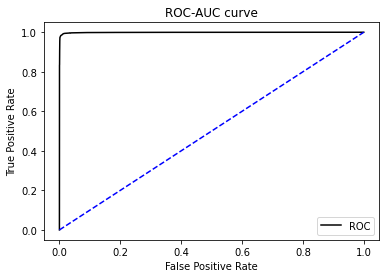

In [89]:
plt.plot(fpr,tpr,color='k',label='ROC')
plt.plot([0,1],[0,1],color='b',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend()

### Saving the model

In [90]:
import joblib
joblib.dump(model,'micro_credit.obj')

['micro_credit.obj']